# 🎯 **The Complete Guide to ROC-AUC for Beginners**
## *From Zero to Hero in Classification Metrics*

---

**Welcome!** This notebook is your ultimate guide to understanding **ROC-AUC** - one of the most important metrics in machine learning classification.

### 📚 **What You'll Learn:**
| Module | Topic | Duration |
|--------|-------|----------|
| 1️⃣ | What is ROC-AUC? | 10 min |
| 2️⃣ | The Confusion Matrix Foundation | 15 min |
| 3️⃣ | TPR vs FPR Deep Dive | 15 min |
| 4️⃣ | The ROC Curve Construction | 20 min |
| 5️⃣ | AUC Interpretation & Assumptions | 15 min |
| 6️⃣ | When to Use vs Other Metrics | 10 min |
| 7️⃣ | Statistical Tests & EDA | 20 min |
| 8️⃣ | Practical Implementation | 25 min |

**Prerequisites:** Basic Python, Basic Statistics  
**Difficulty:** ⭐ Beginner Friendly  

---



In [1]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification, load_breast_cancer, load_digits
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Libraries imported successfully!")



✅ Libraries imported successfully!


## 📖 **Chapter 1: What is ROC-AUC?**

### 🎭 **The Story Behind the Name**

| Acronym | Full Name | Emoji |
|---------|-----------|-------|
| **ROC** | **R**eceiver **O**perating **C**haracteristic | 📡 |
| **AUC** | **A**rea **U**nder the **C**urve | 📊 |

> **History Note:** ROC curves were first developed during **World War II** for radar signal detection! They measured how well radar operators could distinguish enemy aircraft from noise. Today, we use them to distinguish between classes in ML.

---

### 🎯 **Simple Definition**

```
┌─────────────────────────────────────────────────────────┐
│  ROC-AUC measures how well your model distinguishes     │
│  between POSITIVE class (1) and NEGATIVE class (0)      │
│  across ALL possible classification thresholds.          │
└─────────────────────────────────────────────────────────┘
```

### 🧠 **Analogy: The Medical Test**

Imagine a blood test for a disease:
- **Perfect Test (AUC = 1.0):** All sick people test positive, all healthy test negative
- **Random Test (AUC = 0.5):** Coin flip - no better than guessing
- **Worse than Random (AUC < 0.5):** The test is inverted (always wrong!)

| AUC Score | Interpretation | Grade |
|-----------|----------------|-------|
| 0.90 - 1.00 | Excellent 🏆 | A+ |
| 0.80 - 0.90 | Good 👍 | A |
| 0.70 - 0.80 | Fair 🙂 | B |
| 0.60 - 0.70 | Poor 😐 | C |
| 0.50 - 0.60 | Fail ❌ | D |
| < 0.50 | Worse than random 🙃 | F |

---



## 📖 **Chapter 2: The Foundation - Confusion Matrix**

Before understanding ROC-AUC, we MUST understand the **Confusion Matrix** - it's the building block!

### 🔲 **The 2×2 Confusion Matrix**

```
                    PREDICTED
                 ┌─────────┬─────────┐
                 │    1    │    0    │
    ┌────────────┼─────────┼─────────┤
 A  │     1      │   TP    │   FN    │
 C  │  (Actual   │         │         │
 T  │   Positive)│  ✓✓✓    │  ✗✗✗    │
 U  ├────────────┼─────────┼─────────┤
 A  │     0      │   FP    │   TN    │
 L  │  (Actual   │         │         │
    │  Negative) │  ✗✗✗    │  ✓✓✓    │
    └────────────┴─────────┴─────────┘
```

### 🎭 **The Four Characters:**

| Term | Full Name | Meaning | Emoji |
|------|-----------|---------|-------|
| **TP** | True Positive | Predicted 1, Actually 1 (Correct!) | ✅ |
| **TN** | True Negative | Predicted 0, Actually 0 (Correct!) | ✅ |
| **FP** | False Positive | Predicted 1, Actually 0 (Type I Error) | ❌ |
| **FN** | False Negative | Predicted 0, Actually 1 (Type II Error) | ❌ |

### 📊 **Create Your First Confusion Matrix**




🎯 CONFUSION MATRIX BREAKDOWN:
True Negatives (TN):  4  ✅ Actually 0, Predicted 0
False Positives (FP): 1  ❌ Actually 0, Predicted 1
False Negatives (FN): 1  ❌ Actually 1, Predicted 0
True Positives (TP):  4  ✅ Actually 1, Predicted 1


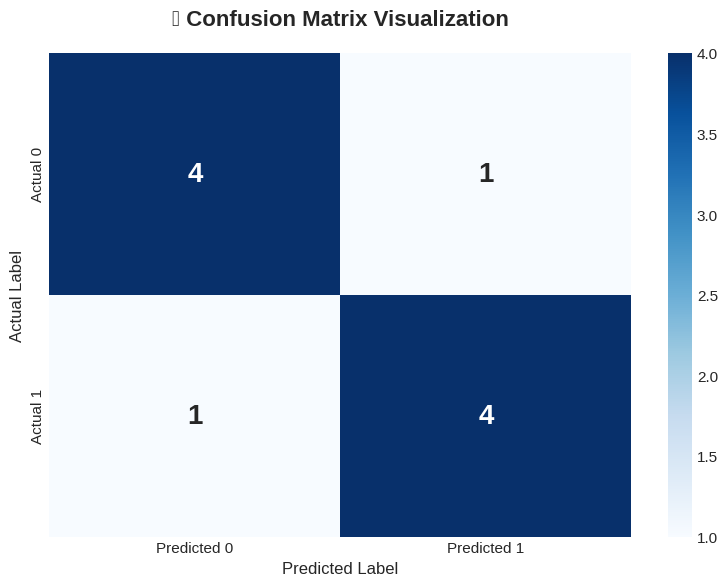


📊 Basic Metrics from Confusion Matrix:
   Accuracy:  0.80  = (TP+TN)/(Total)
   Precision: 0.80  = TP/(TP+FP)
   Recall:    0.80  = TP/(TP+FN)


In [2]:
# Generate simple binary classification data
np.random.seed(42)
y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # True labels
y_pred = np.array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])  # Predicted labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

print("🎯 CONFUSION MATRIX BREAKDOWN:")
print("="*50)
print(f"True Negatives (TN):  {tn}  ✅ Actually 0, Predicted 0")
print(f"False Positives (FP): {fp}  ❌ Actually 0, Predicted 1")
print(f"False Negatives (FN): {fn}  ❌ Actually 1, Predicted 0")
print(f"True Positives (TP):  {tp}  ✅ Actually 1, Predicted 1")
print("="*50)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            annot_kws={"size": 20, "weight": "bold"})
plt.title('🔲 Confusion Matrix Visualization', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate basic metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"\n📊 Basic Metrics from Confusion Matrix:")
print(f"   Accuracy:  {accuracy:.2f}  = (TP+TN)/(Total)")
print(f"   Precision: {precision:.2f}  = TP/(TP+FP)")
print(f"   Recall:    {recall:.2f}  = TP/(TP+FN)")



## 📖 **Chapter 3: TPR vs FPR - The Heart of ROC**

### 🎭 **Introducing the Two Main Characters**

ROC curve plots two rates against each other:

```
┌─────────────────────────────────────────────────────────┐
│  Y-axis: TPR (True Positive Rate)                       │
│         "How many actual positives did we catch?"       │
│                                                         │
│  X-axis: FPR (False Positive Rate)                      │
│         "How many actual negatives did we misclassify?" │
└─────────────────────────────────────────────────────────┘
```

### 📐 **The Formulas**

| Metric | Formula | Also Called | Intuition |
|--------|---------|-------------|-----------|
| **TPR** | $\frac{TP}{TP + FN}$ | Sensitivity, Recall | Coverage of positive class |
| **FPR** | $\frac{FP}{FP + TN}$ | 1 - Specificity | False alarm rate |
| **TNR** | $\frac{TN}{FP + TN}$ | Specificity | Coverage of negative class |

### 🧠 **Memory Trick**

```
TPR = TP / (All Positives)  →  "Of all sick people, how many did we find?"
FPR = FP / (All Negatives)  →  "Of all healthy people, how many did we scare?"
```

**Goal:** Maximize TPR (find all sick people) while Minimizing FPR (don't scare healthy people)



In [3]:
# Demonstrate TPR and FPR calculation
def calculate_rates(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tnr = tn / (fp + tn) if (fp + tn) > 0 else 0
    
    return {
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
        'TPR (Sensitivity)': tpr,
        'FPR (1-Specificity)': fpr,
        'TNR (Specificity)': tnr
    }

# Example calculations
print("🔍 TPR vs FPR Calculation Examples:")
print("="*60)

# Scenario 1: Strict threshold (predicts 1 only when very confident)
y_pred_strict = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
rates_strict = calculate_rates(y_true, y_pred_strict)
print("\n🟢 Scenario 1: Strict Threshold (Predict '1' rarely)")
for key, val in rates_strict.items():
    print(f"   {key}: {val:.3f}" if isinstance(val, float) else f"   {key}: {val}")

# Scenario 2: Lenient threshold (predicts 1 easily)
y_pred_lenient = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])
rates_lenient = calculate_rates(y_true, y_pred_lenient)
print("\n🔴 Scenario 2: Lenient Threshold (Predict '1' easily)")
for key, val in rates_lenient.items():
    print(f"   {key}: {val:.3f}" if isinstance(val, float) else f"   {key}: {val}")

print("\n" + "="*60)
print("💡 Key Insight: As we make more positive predictions...")
print(f"   Strict → TPR: {rates_strict['TPR (Sensitivity)']:.2f}, FPR: {rates_strict['FPR (1-Specificity)']:.2f}")
print(f"   Lenient → TPR: {rates_lenient['TPR (Sensitivity)']:.2f}, FPR: {rates_lenient['FPR (1-Specificity)']:.2f}")
print("   We catch more positives (higher TPR) but at cost of more false alarms (higher FPR)")



🔍 TPR vs FPR Calculation Examples:

🟢 Scenario 1: Strict Threshold (Predict '1' rarely)
   TP: 2
   TN: 5
   FP: 0
   FN: 3
   TPR (Sensitivity): 0.400
   FPR (1-Specificity): 0.000
   TNR (Specificity): 1.000

🔴 Scenario 2: Lenient Threshold (Predict '1' easily)
   TP: 5
   TN: 1
   FP: 4
   FN: 0
   TPR (Sensitivity): 1.000
   FPR (1-Specificity): 0.800
   TNR (Specificity): 0.200

💡 Key Insight: As we make more positive predictions...
   Strict → TPR: 0.40, FPR: 0.00
   Lenient → TPR: 1.00, FPR: 0.80
   We catch more positives (higher TPR) but at cost of more false alarms (higher FPR)


## 📖 **Chapter 4: Building the ROC Curve Step-by-Step**

### 🏗️ **Construction Process**

The ROC curve is built by varying the **classification threshold** from 0 to 1:

```
Step 1: Get probability scores from model (not just 0/1 predictions)
        ↓
Step 2: Sort all samples by probability (highest to lowest)
        ↓
Step 3: For each possible threshold, calculate TPR and FPR
        ↓
Step 4: Plot FPR (x-axis) vs TPR (y-axis)
        ↓
Step 5: Calculate AUC = Area under this curve
```

### 🎨 **Threshold Examples**

| Threshold | Rule | Result |
|-----------|------|--------|
| 1.0 | Predict 1 only if P(1) ≥ 1.0 | No predictions of 1 (conservative) |
| 0.5 | Predict 1 if P(1) ≥ 0.5 | Balanced approach |
| 0.0 | Predict 1 if P(1) ≥ 0.0 | Always predict 1 (aggressive) |

### 📊 **Visual Demonstration**




📋 Step 1: Probability Scores (Sorted by Confidence)
   True_Label  Predicted_Prob
0           1        0.990730
1           1        0.942139
2           1        0.929414
3           1        0.928212
4           1        0.922007
5           1        0.876445
6           1        0.731921
7           1        0.693897
8           1        0.632279
9           0        0.492627

... showing 20 total samples


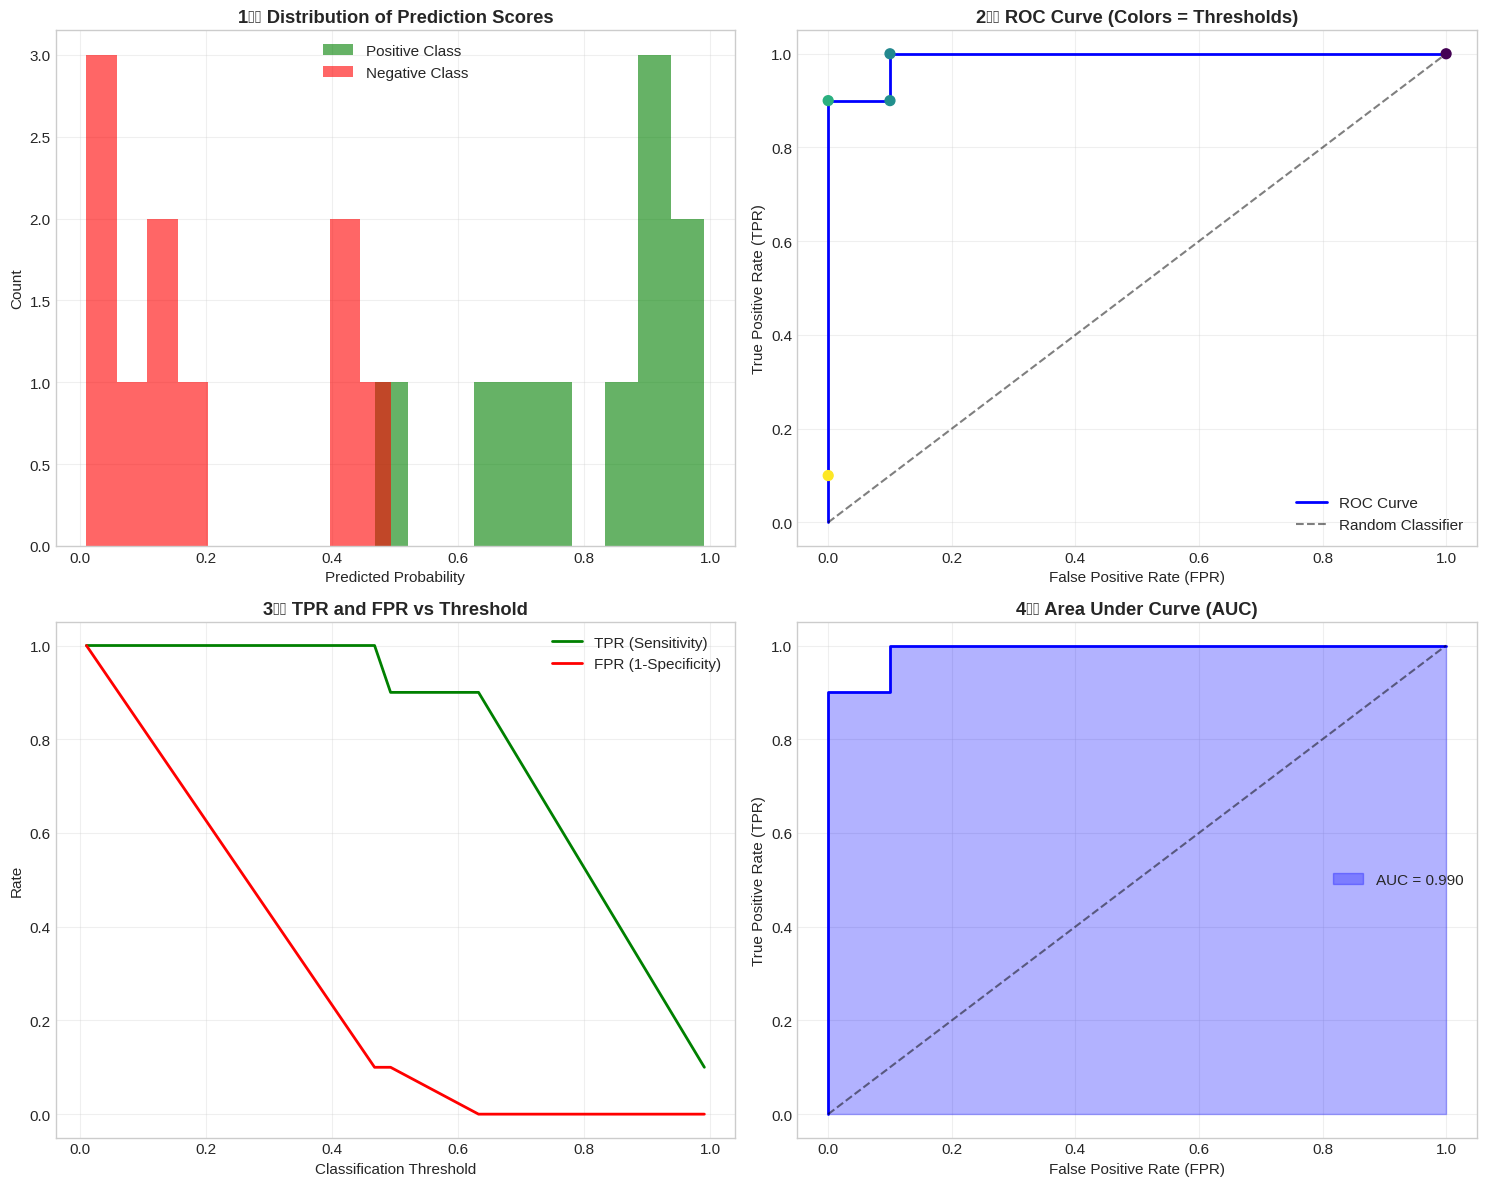


✅ AUC Score: 0.9900


In [4]:
# Create a detailed example showing how ROC curve is built
np.random.seed(42)
n_samples = 20

# Generate synthetic data with clear separation
X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, 
                          class_sep=1.5, random_state=42)

# Train a simple model
model = LogisticRegression()
model.fit(X, y)

# Get probability scores
y_proba = model.predict_proba(X)[:, 1]

# Create DataFrame for visualization
df_viz = pd.DataFrame({
    'True_Label': y,
    'Predicted_Prob': y_proba
}).sort_values('Predicted_Prob', ascending=False).reset_index(drop=True)

print("📋 Step 1: Probability Scores (Sorted by Confidence)")
print("="*60)
print(df_viz.head(10).to_string())
print(f"\n... showing {n_samples} total samples")

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Plot the construction process
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Distribution of scores by class
ax1 = axes[0, 0]
pos_scores = y_proba[y == 1]
neg_scores = y_proba[y == 0]
ax1.hist(pos_scores, bins=10, alpha=0.6, label='Positive Class', color='green')
ax1.hist(neg_scores, bins=10, alpha=0.6, label='Negative Class', color='red')
ax1.set_xlabel('Predicted Probability')
ax1.set_ylabel('Count')
ax1.set_title('1️⃣ Distribution of Prediction Scores', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: ROC Curve with thresholds marked
ax2 = axes[0, 1]
ax2.plot(fpr, tpr, 'b-', linewidth=2, label='ROC Curve')
ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
ax2.scatter(fpr[::max(1, len(fpr)//10)], tpr[::max(1, len(tpr)//10)], 
           c=thresholds[::max(1, len(thresholds)//10)], cmap='viridis', s=50, zorder=5)
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('2️⃣ ROC Curve (Colors = Thresholds)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: How TPR and FPR change with threshold
ax3 = axes[1, 0]
ax3.plot(thresholds, tpr, 'g-', label='TPR (Sensitivity)', linewidth=2)
ax3.plot(thresholds, fpr, 'r-', label='FPR (1-Specificity)', linewidth=2)
ax3.set_xlabel('Classification Threshold')
ax3.set_ylabel('Rate')
ax3.set_title('3️⃣ TPR and FPR vs Threshold', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: AUC illustration
ax4 = axes[1, 1]
ax4.fill_between(fpr, tpr, alpha=0.3, color='blue', label=f'AUC = {auc(fpr, tpr):.3f}')
ax4.plot(fpr, tpr, 'b-', linewidth=2)
ax4.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax4.set_xlabel('False Positive Rate (FPR)')
ax4.set_ylabel('True Positive Rate (TPR)')
ax4.set_title('4️⃣ Area Under Curve (AUC)', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_construction.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ AUC Score: {roc_auc_score(y, y_proba):.4f}")



## 📖 **Chapter 5: AUC - Area Under Curve Deep Dive**

### 📏 **What Does AUC Actually Mean?**

```
┌─────────────────────────────────────────────────────────┐
│  AUC = P(Model ranks random positive higher than       │
│        random negative)                                 │
└─────────────────────────────────────────────────────────┘
```

**In Plain English:** If you randomly pick one positive and one negative sample, AUC is the probability that your model will give the positive sample a higher score than the negative sample.

### 🎯 **Probabilistic Interpretation**

| AUC | Interpretation |
|-----|----------------|
| 0.5 | Model can't distinguish between classes (random guessing) |
| 0.7 | 70% chance model ranks a random positive above a random negative |
| 0.9 | 90% chance of correct ranking |
| 1.0 | Perfect ranking (no overlap between classes) |

### 📐 **Geometric Interpreture**

```
Perfect Classifier (AUC = 1.0):
    TPR
    1.0 ┤    ████████████
        │    ████████████
    0.5 ┤    ████████████
        │    ████████████
    0.0 ┼────┴───────────┤
        0.0  0.5        1.0 FPR
    
Random Classifier (AUC = 0.5):
    TPR
    1.0 ┤              ██
        │           ██   
    0.5 ┤        ██      
        │     ██         
    0.0 ┼──█─────────────┤
        0.0  0.5        1.0 FPR
```



🔬 EMPIRICAL VERIFICATION OF AUC INTERPRETATION
Calculated AUC:        0.9279
Empirical Probability: 0.9340
Difference:            0.0061

This confirms: AUC = P(Score_Positive > Score_Negative)


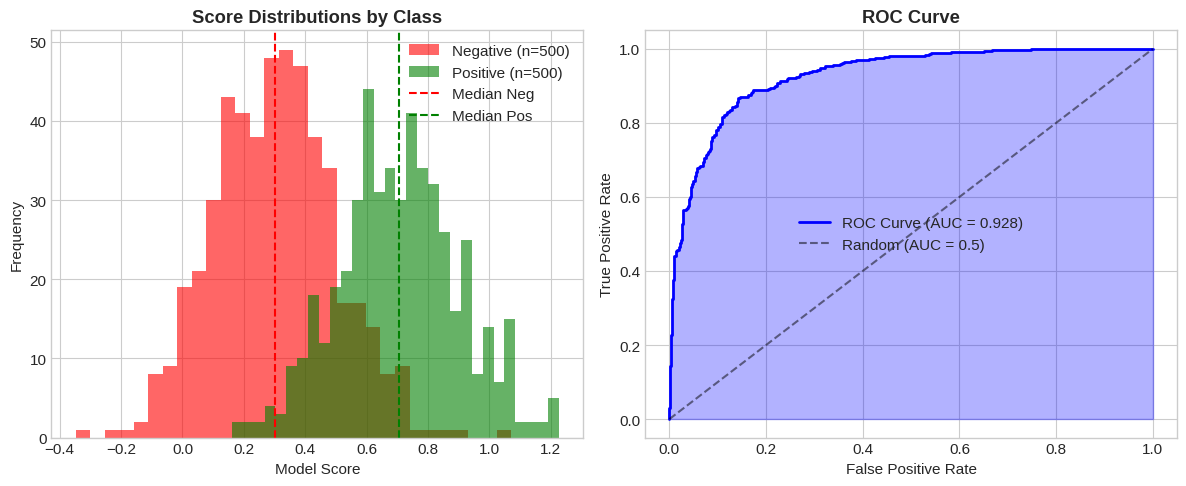

In [5]:
# Demonstrate AUC interpretation
def demonstrate_auc_interpretation(n_pairs=1000):
    """
    Demonstrate that AUC = probability of correct ranking
    """
    np.random.seed(42)
    
    # Generate scores
    y_true = np.array([0] * 500 + [1] * 500)
    # Class 1 has higher scores on average
    scores = np.concatenate([
        np.random.normal(0.3, 0.2, 500),  # Class 0
        np.random.normal(0.7, 0.2, 500)   # Class 1
    ])
    
    # Calculate AUC
    auc_score = roc_auc_score(y_true, scores)
    
    # Empirical test: Random pairs
    correct_rankings = 0
    pos_indices = np.where(y_true == 1)[0]
    neg_indices = np.where(y_true == 0)[0]
    
    for _ in range(n_pairs):
        pos_idx = np.random.choice(pos_indices)
        neg_idx = np.random.choice(neg_indices)
        
        if scores[pos_idx] > scores[neg_idx]:
            correct_rankings += 1
    
    empirical_prob = correct_rankings / n_pairs
    
    return auc_score, empirical_prob, scores, y_true

auc_score, empirical_prob, scores, y_true = demonstrate_auc_interpretation()

print("🔬 EMPIRICAL VERIFICATION OF AUC INTERPRETATION")
print("="*60)
print(f"Calculated AUC:        {auc_score:.4f}")
print(f"Empirical Probability: {empirical_prob:.4f}")
print(f"Difference:            {abs(auc_score - empirical_prob):.4f}")
print("\nThis confirms: AUC = P(Score_Positive > Score_Negative)")

# Visualize score distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
pos_scores = scores[y_true == 1]
neg_scores = scores[y_true == 0]
plt.hist(neg_scores, bins=30, alpha=0.6, label=f'Negative (n={len(neg_scores)})', color='red')
plt.hist(pos_scores, bins=30, alpha=0.6, label=f'Positive (n={len(pos_scores)})', color='green')
plt.axvline(x=np.median(neg_scores), color='red', linestyle='--', label='Median Neg')
plt.axvline(x=np.median(pos_scores), color='green', linestyle='--', label='Median Pos')
plt.xlabel('Model Score')
plt.ylabel('Frequency')
plt.title('Score Distributions by Class', fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_true, scores)
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()



## 📖 **Chapter 6: Assumptions of ROC-AUC**

### ⚠️ **Critical Assumptions**

| Assumption | Explanation | Violation Consequences |
|------------|-------------|------------------------|
| **1. Binary Classification** | Only works with two classes | Use multi-class extensions (OvR) |
| **2. Probabilistic Scores** | Needs continuous scores, not just 0/1 | Use calibration techniques |
| **3. Independent Samples** | Samples should be i.i.d. | Time series require adjustments |
| **4. Sufficient Sample Size** | Needs enough samples for stable estimate | High variance in small samples |
| **5. Class Overlap** | Assumes some separability is possible | AUC=0.5 means no signal |

### 🎭 **When AUC Can Be Misleading**

```
❌ Class Imbalance Extremes:
   - If 99% are negative, high AUC might not translate to good precision
   - A model predicting all negatives has undefined precision but good specificity
   
❌ Different Misclassification Costs:
   - AUC treats FP and FN equally
   - Medical diagnosis: Missing cancer (FN) is worse than false alarm (FP)
   - Use cost-sensitive metrics instead
   
❌ Threshold Selection:
   - AUC averages over all thresholds
   - You might only care about one specific operating point
```

### 📊 **Comparison with Other Metrics**

| Metric | Best For | Limitation | Use When |
|--------|----------|------------|----------|
| **ROC-AUC** | Overall ranking ability | Ignores calibration | Balanced classes, ranking tasks |
| **PR-AUC** | Imbalanced data | Sensitive to class imbalance | Rare positive class (fraud, disease) |
| **F1-Score** | Balance precision/recall | Single threshold only | You need a specific decision threshold |
| **Accuracy** | Balanced, equal costs | Misleading if imbalanced | Classes are balanced and costs equal |
| **Log-Loss** | Calibrated probabilities | Penalizes confident wrong predictions | You need probability estimates |



📊 ROC-AUC vs PR-AUC Under Class Imbalance
 Pos_Ratio  ROC_AUC   PR_AUC  Difference
      0.50 0.967288 0.967222    0.000066
      0.20 0.967888 0.912362    0.055526
      0.10 0.974511 0.886800    0.087711
      0.05 0.975095 0.816583    0.158512
      0.01 0.964141 0.536482    0.427659


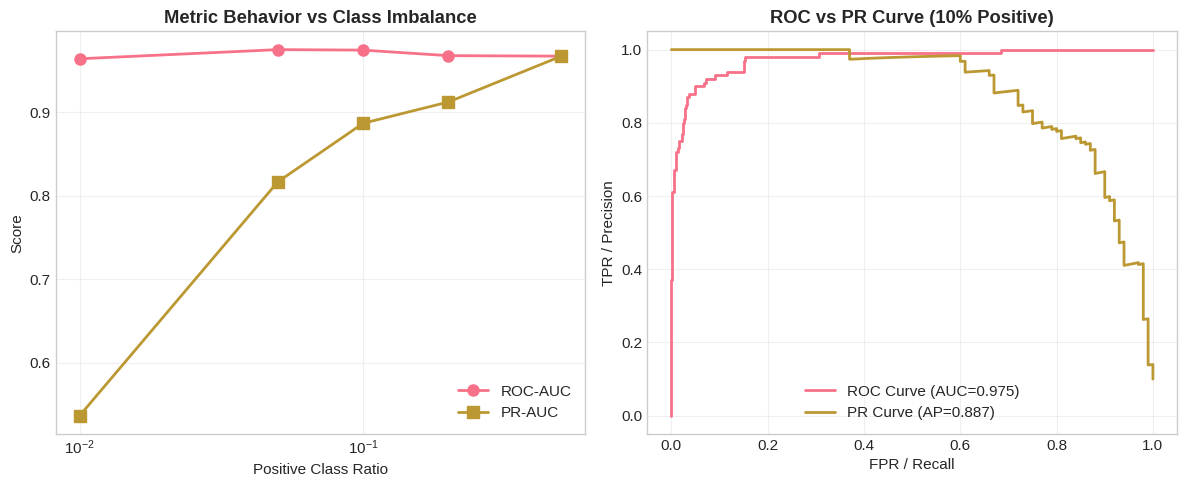


💡 Key Insight: As imbalance increases, PR-AUC drops more dramatically than ROC-AUC
   Use PR-AUC when dealing with highly imbalanced data!


In [6]:
# Compare ROC-AUC vs PR-AUC in imbalanced scenarios
def compare_metrics_imbalance(pos_ratio=0.1):
    """
    Compare ROC-AUC and PR-AUC under class imbalance
    """
    np.random.seed(42)
    n_samples = 1000
    n_pos = int(n_samples * pos_ratio)
    n_neg = n_samples - n_pos
    
    # Generate imbalanced data
    y_true = np.array([1]*n_pos + [0]*n_neg)
    # Weak classifier
    scores = np.concatenate([
        np.random.beta(2, 5, n_pos),  # Positives: lower scores on average
        np.random.beta(5, 2, n_neg)   # Negatives: higher scores on average
    ])
    
    # Invert scores to make it a decent classifier
    scores = 1 - scores
    
    roc_auc = roc_auc_score(y_true, scores)
    pr_auc = average_precision_score(y_true, scores)
    
    return roc_auc, pr_auc, y_true, scores

# Test different imbalance ratios
ratios = [0.5, 0.2, 0.1, 0.05, 0.01]
results = []

for ratio in ratios:
    roc_auc, pr_auc, y_true, scores = compare_metrics_imbalance(ratio)
    results.append({
        'Pos_Ratio': ratio,
        'ROC_AUC': roc_auc,
        'PR_AUC': pr_auc,
        'Difference': roc_auc - pr_auc
    })

results_df = pd.DataFrame(results)

print("📊 ROC-AUC vs PR-AUC Under Class Imbalance")
print("="*60)
print(results_df.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df['Pos_Ratio'], results_df['ROC_AUC'], 'o-', label='ROC-AUC', linewidth=2, markersize=8)
plt.plot(results_df['Pos_Ratio'], results_df['PR_AUC'], 's-', label='PR-AUC', linewidth=2, markersize=8)
plt.xlabel('Positive Class Ratio')
plt.ylabel('Score')
plt.title('Metric Behavior vs Class Imbalance', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

# Example with 10% positive class
roc_auc, pr_auc, y_true, scores = compare_metrics_imbalance(0.1)
fpr, tpr, _ = roc_curve(y_true, scores)
precision, recall, _ = precision_recall_curve(y_true, scores)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.3f})', linewidth=2)
plt.plot(recall, precision, label=f'PR Curve (AP={pr_auc:.3f})', linewidth=2)
plt.xlabel('FPR / Recall')
plt.ylabel('TPR / Precision')
plt.title('ROC vs PR Curve (10% Positive)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: As imbalance increases, PR-AUC drops more dramatically than ROC-AUC")
print("   Use PR-AUC when dealing with highly imbalanced data!")



## 📖 **Chapter 7: Best Data Types for ROC-AUC**

### ✅ **Ideal Scenarios for ROC-AUC**

| Data Characteristic | Why ROC-AUC Works Well | Example |
|--------------------|------------------------|---------|
| **Balanced Classes** | Both classes contribute equally | Customer churn (50/50) |
| **Ranking Important** | Relative ordering matters | Search results ranking |
| **Threshold Agnostic** | No specific operating point | Medical screening tests |
| **Probabilistic Output** | Model outputs probabilities | Logistic regression, Neural networks |
| **Equal Misclassification Cost** | FP and FN equally bad | Generic binary classification |

### ❌ **When to Avoid ROC-AUC**

| Scenario | Better Alternative | Reason |
|----------|-------------------|--------|
| **Severe Imbalance (1:100+)** | PR-AUC, F1-score | ROC-AUC can be optimistic |
| **Need Specific Threshold** | F1, Precision, Recall | AUC averages all thresholds |
| **Different Costs (FP vs FN)** | Cost-sensitive metrics | AUC weighs errors equally |
| **Multi-class (no single positive)** | Multi-class log-loss, Macro-F1 | AUC designed for binary |
| **Calibration Critical** | Brier Score, Log-loss | AUC measures ranking, not calibration |

### 📊 **Data Type Compatibility Matrix**

| Data Type | ROC-AUC Suitability | Notes |
|-----------|---------------------|-------|
| Tabular/Numerical | ⭐⭐⭐⭐⭐ | Excellent, use tree-based models |
| Text/Embeddings | ⭐⭐⭐⭐☆ | Good with neural networks |
| Images | ⭐⭐⭐⭐☆ | Good, but often use accuracy |
| Time Series | ⭐⭐⭐☆☆ | Needs temporal validation split |
| Graphs | ⭐⭐⭐☆☆ | Use specialized graph metrics |



🎯 ROC-AUC PERFORMANCE ACROSS DATA TYPES
✅ Clean Tabular Data:     AUC = 0.9647
⚠️  Noisy Data:            AUC = 0.8006
🏥 Medical Data (Cancer):  AUC = 0.9976


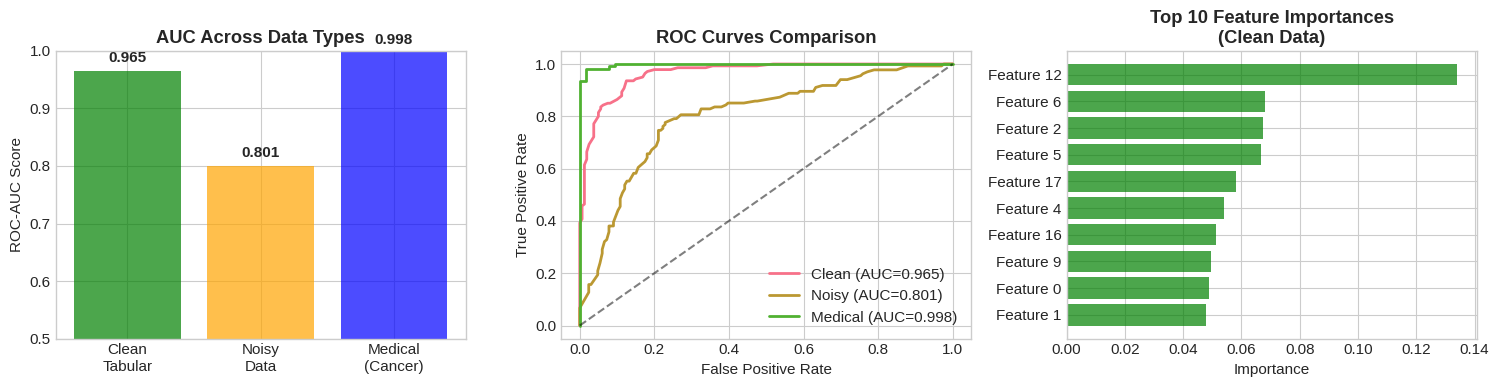

In [7]:
# Demonstrate ROC-AUC on different data types
print("🎯 ROC-AUC PERFORMANCE ACROSS DATA TYPES")
print("="*60)

# 1. Clean Tabular Data
X_clean, y_clean = make_classification(n_samples=1000, n_features=20, 
                                       n_informative=15, n_redundant=5,
                                       random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

model_clean = RandomForestClassifier(n_estimators=100, random_state=42)
model_clean.fit(X_train, y_train)
proba_clean = model_clean.predict_proba(X_test)[:, 1]
auc_clean = roc_auc_score(y_test, proba_clean)
print(f"✅ Clean Tabular Data:     AUC = {auc_clean:.4f}")

# 2. Noisy Data (less separable)
X_noisy, y_noisy = make_classification(n_samples=1000, n_features=20, 
                                       n_informative=5, n_redundant=15,
                                       flip_y=0.3, random_state=42)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y_noisy, test_size=0.3, random_state=42)

model_noisy = RandomForestClassifier(n_estimators=100, random_state=42)
model_noisy.fit(X_train_n, y_train_n)
proba_noisy = model_noisy.predict_proba(X_test_n)[:, 1]
auc_noisy = roc_auc_score(y_test_n, proba_noisy)
print(f"⚠️  Noisy Data:            AUC = {auc_noisy:.4f}")

# 3. Real Dataset (Breast Cancer)
data = load_breast_cancer()
X_real, y_real = data.data, data.target
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

model_real = LogisticRegression(max_iter=1000, random_state=42)
model_real.fit(X_train_r, y_train_r)
proba_real = model_real.predict_proba(X_test_r)[:, 1]
auc_real = roc_auc_score(y_test_r, proba_real)
print(f"🏥 Medical Data (Cancer):  AUC = {auc_real:.4f}")

# Visualization
plt.figure(figsize=(15, 4))

scenarios = ['Clean\nTabular', 'Noisy\nData', 'Medical\n(Cancer)']
aucs = [auc_clean, auc_noisy, auc_real]

plt.subplot(1, 3, 1)
bars = plt.bar(scenarios, aucs, color=['green', 'orange', 'blue'], alpha=0.7)
plt.ylim(0.5, 1.0)
plt.ylabel('ROC-AUC Score')
plt.title('AUC Across Data Types', fontweight='bold')
for bar, auc in zip(bars, aucs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{auc:.3f}', ha='center', va='bottom', fontweight='bold')

# ROC Curves comparison
plt.subplot(1, 3, 2)
fpr_c, tpr_c, _ = roc_curve(y_test, proba_clean)
fpr_n, tpr_n, _ = roc_curve(y_test_n, proba_noisy)
fpr_r, tpr_r, _ = roc_curve(y_test_r, proba_real)

plt.plot(fpr_c, tpr_c, label=f'Clean (AUC={auc_clean:.3f})', linewidth=2)
plt.plot(fpr_n, tpr_n, label=f'Noisy (AUC={auc_noisy:.3f})', linewidth=2)
plt.plot(fpr_r, tpr_r, label=f'Medical (AUC={auc_real:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison', fontweight='bold')
plt.legend()

# Feature importance for clean data
plt.subplot(1, 3, 3)
importances = model_clean.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10
plt.barh(range(10), importances[indices], color='green', alpha=0.7)
plt.yticks(range(10), [f'Feature {i}' for i in indices])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances\n(Clean Data)', fontweight='bold')

plt.tight_layout()
plt.show()



## 📖 **Chapter 8: Statistical Tests for ROC-AUC**

### 🔬 **Essential Statistical Tests**

When comparing two models using ROC-AUC, we need statistical significance tests:

| Test | Purpose | When to Use |
|------|---------|-------------|
| **DeLong's Test** | Compare two correlated ROC curves | Same test set, different models |
| **Hanley-McNeil Test** | Compare two independent AUCs | Different test sets |
| **Bootstrap Confidence Intervals** | Estimate AUC uncertainty | Small sample sizes |
| **Cross-Validation** | Estimate generalization | Model selection |

### 📊 **Bootstrap Confidence Interval (Most Practical)**

```
Step 1: Take B bootstrap samples (e.g., 1000) from your data
Step 2: Calculate AUC for each sample
Step 3: Use percentiles (2.5th, 97.5th) for 95% CI
```

### ⚖️ **Comparing Two Models**

To claim Model A is better than Model B:
1. Check if confidence intervals overlap
2. Perform paired t-test on CV scores
3. Verify on held-out test set



🔬 BOOTSTRAP CONFIDENCE INTERVALS (95%)
Logistic Regression:
   Point Estimate: 0.9442
   Bootstrap Mean: 0.9440
   95% CI: [0.9037, 0.9756]
   Margin of Error: ±0.0360

Random Forest:
   Point Estimate: 0.9856
   Bootstrap Mean: 0.9853
   95% CI: [0.9670, 0.9970]
   Margin of Error: ±0.0150

📊 Comparison (RF - LR): +0.0414
⚠️  No statistically significant difference (CIs overlap)


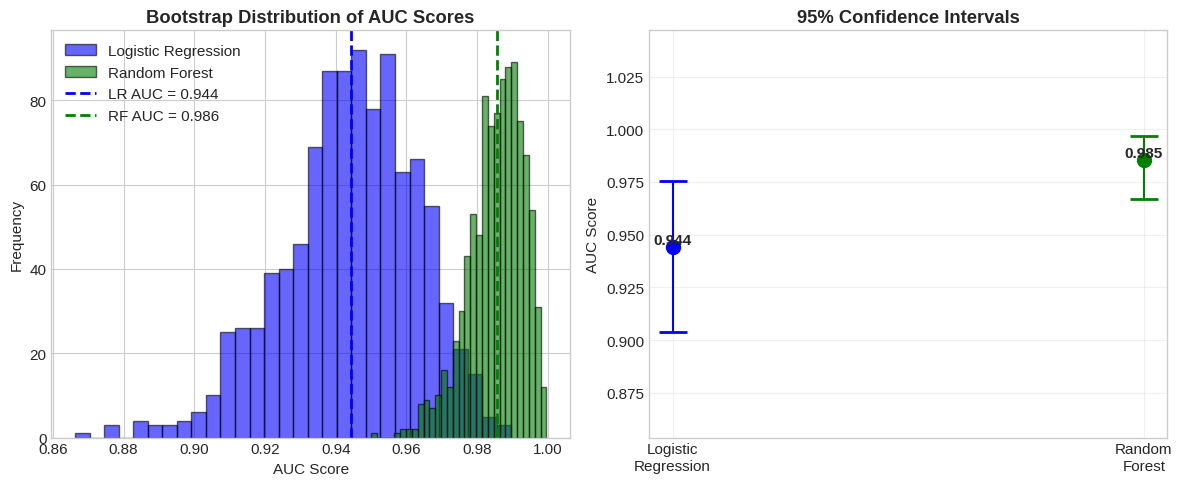

In [8]:
def bootstrap_auc(y_true, y_scores, n_bootstrap=1000, confidence_level=0.95):
    """
    Calculate bootstrap confidence interval for AUC
    """
    rng = np.random.RandomState(42)
    n_samples = len(y_true)
    auc_scores = []
    
    for _ in range(n_bootstrap):
        # Bootstrap sample
        indices = rng.randint(0, n_samples, n_samples)
        if len(np.unique(y_true[indices])) < 2:
            continue  # Skip if only one class present
        
        auc = roc_auc_score(y_true[indices], y_scores[indices])
        auc_scores.append(auc)
    
    auc_scores = np.array(auc_scores)
    mean_auc = np.mean(auc_scores)
    
    # Confidence interval
    alpha = 1 - confidence_level
    lower = np.percentile(auc_scores, alpha/2 * 100)
    upper = np.percentile(auc_scores, (1 - alpha/2) * 100)
    
    return mean_auc, lower, upper, auc_scores

# Generate data
X, y = make_classification(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train two models
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(n_estimators=50, random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

proba1 = model1.predict_proba(X_test)[:, 1]
proba2 = model2.predict_proba(X_test)[:, 1]

# Calculate bootstrap CIs
print("🔬 BOOTSTRAP CONFIDENCE INTERVALS (95%)")
print("="*60)

auc1 = roc_auc_score(y_test, proba1)
mean1, lower1, upper1, scores1 = bootstrap_auc(y_test, proba1)
print(f"Logistic Regression:")
print(f"   Point Estimate: {auc1:.4f}")
print(f"   Bootstrap Mean: {mean1:.4f}")
print(f"   95% CI: [{lower1:.4f}, {upper1:.4f}]")
print(f"   Margin of Error: ±{(upper1-lower1)/2:.4f}")

auc2 = roc_auc_score(y_test, proba2)
mean2, lower2, upper2, scores2 = bootstrap_auc(y_test, proba2)
print(f"\nRandom Forest:")
print(f"   Point Estimate: {auc2:.4f}")
print(f"   Bootstrap Mean: {mean2:.4f}")
print(f"   95% CI: [{lower2:.4f}, {upper2:.4f}]")
print(f"   Margin of Error: ±{(upper2-lower2)/2:.4f}")

# Statistical comparison
diff = auc2 - auc1
print(f"\n📊 Comparison (RF - LR): {diff:+.4f}")
if upper1 < lower2 or upper2 < lower1:
    print("✅ Statistically significant difference (CIs don't overlap)")
else:
    print("⚠️  No statistically significant difference (CIs overlap)")

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(scores1, bins=30, alpha=0.6, label='Logistic Regression', color='blue', edgecolor='black')
plt.hist(scores2, bins=30, alpha=0.6, label='Random Forest', color='green', edgecolor='black')
plt.axvline(auc1, color='blue', linestyle='--', linewidth=2, label=f'LR AUC = {auc1:.3f}')
plt.axvline(auc2, color='green', linestyle='--', linewidth=2, label=f'RF AUC = {auc2:.3f}')
plt.xlabel('AUC Score')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of AUC Scores', fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
models = ['Logistic\nRegression', 'Random\nForest']
means = [mean1, mean2]
errors = [[mean1-lower1, mean2-lower2], [upper1-mean1, upper2-mean2]]
colors = ['blue', 'green']

x_pos = np.arange(len(models))
for i, (model, mean, color) in enumerate(zip(models, means, colors)):
    plt.errorbar(x_pos[i], mean, yerr=[[errors[0][i]], [errors[1][i]]], 
                 fmt='o', color=color, capsize=10, capthick=2, markersize=10)
    plt.text(x_pos[i], mean, f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(x_pos, models)
plt.ylabel('AUC Score')
plt.title('95% Confidence Intervals', fontweight='bold')
plt.ylim(min(lower1, lower2)-0.05, max(upper1, upper2)+0.05)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## 📖 **Chapter 9: EDA Checklist for ROC-AUC**

### ✅ **Pre-Modeling EDA Checklist**

Before training your model, perform these checks:

| Check | Why It Matters | Tool/Method |
|-------|----------------|-------------|
| **1. Class Balance** | Imbalance affects AUC interpretation | `value_counts()`, pie chart |
| **2. Feature Distributions** | Overlap between classes affects AUC | KDE plots, histograms |
| **3. Missing Values** | Can bias model and AUC | `isnull().sum()`, heatmap |
| **4. Outliers** | Extreme values skew probabilities | Box plots, Z-score |
| **5. Correlations** | Redundant features don't help | Correlation matrix |
| **6. Linear Separability** | If linearly separable, any model gets AUC=1 | Scatter plots |

### 🎯 **Post-Modeling EDA Checklist**

After training, validate your AUC:

| Check | Purpose | How |
|-------|---------|-----|
| **1. ROC Curve Shape** | Check for irregularities (overfitting) | Visual inspection |
| **2. Calibration** | Are probabilities accurate? | Reliability diagram |
| **3. Threshold Analysis** | Best operating point for your use case | Youden's J statistic |
| **4. Cross-Validation** | Is AUC stable across folds? | `cross_val_score` |
| **5. Class-wise Performance** | AUC might hide poor performance on one class | Per-class metrics |

### 🛠️ **Automated EDA Function**



🔍 COMPREHENSIVE EDA FOR ROC-AUC

📊 1. CLASS BALANCE
   Class 0: 49.60%
   Class 1: 50.40%
   Imbalance Ratio: 1.02:1
   ✅ Balanced classes. ROC-AUC is appropriate.

📈 2. FEATURE SEPARABILITY
   Top 5 most separable features (Cohen's d):
   - Feature_9: 0.676
   - Feature_6: 0.655
   - Feature_5: 0.586
   - Feature_3: 0.583
   - Feature_1: 0.162

❓ 3. MISSING VALUES
   ✅ No missing values

🔗 4. FEATURE-TARGET CORRELATIONS
   Top 5 correlations with target:
   - Feature_9: 0.320
   - Feature_6: 0.311
   - Feature_5: 0.281
   - Feature_3: 0.280
   - Feature_1: 0.081


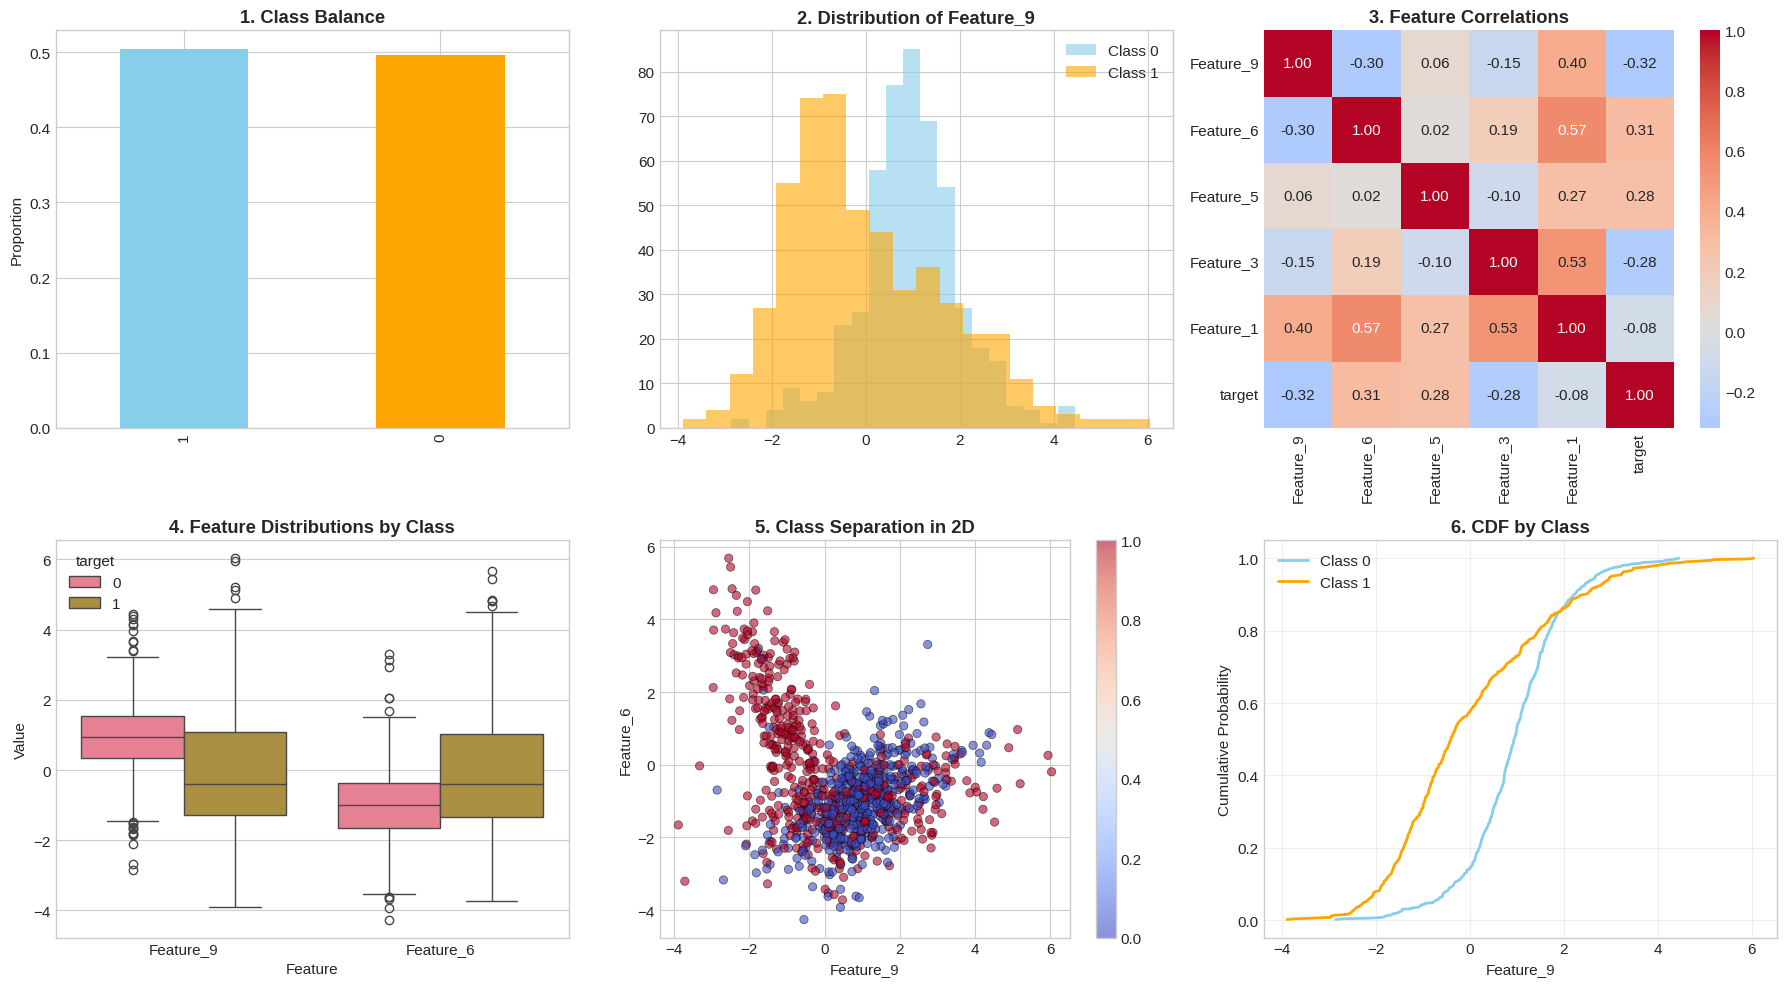

In [9]:
def comprehensive_auc_eda(X, y, feature_names=None):
    """
    Comprehensive EDA checklist for ROC-AUC preparation
    """
    if feature_names is None:
        feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
    
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    
    print("🔍 COMPREHENSIVE EDA FOR ROC-AUC")
    print("="*70)
    
    # 1. Class Balance
    print("\n📊 1. CLASS BALANCE")
    balance = pd.Series(y).value_counts(normalize=True)
    print(f"   Class 0: {balance[0]:.2%}")
    print(f"   Class 1: {balance[1]:.2%}")
    imbalance_ratio = max(balance) / min(balance)
    print(f"   Imbalance Ratio: {imbalance_ratio:.2f}:1")
    if imbalance_ratio > 10:
        print("   ⚠️  High imbalance detected! Consider PR-AUC instead.")
    elif imbalance_ratio > 3:
        print("   ⚠️  Moderate imbalance. Monitor both ROC-AUC and PR-AUC.")
    else:
        print("   ✅ Balanced classes. ROC-AUC is appropriate.")
    
    # 2. Feature Statistics by Class
    print("\n📈 2. FEATURE SEPARABILITY")
    separability_scores = []
    for col in feature_names:
        pos_mean = df[df['target']==1][col].mean()
        neg_mean = df[df['target']==0][col].mean()
        pos_std = df[df['target']==1][col].std()
        neg_std = df[df['target']==0][col].std()
        
        # Cohen's d (effect size)
        pooled_std = np.sqrt((pos_std**2 + neg_std**2) / 2)
        cohens_d = abs(pos_mean - neg_mean) / pooled_std if pooled_std > 0 else 0
        separability_scores.append((col, cohens_d))
    
    separability_scores.sort(key=lambda x: x[1], reverse=True)
    print("   Top 5 most separable features (Cohen's d):")
    for feat, score in separability_scores[:5]:
        print(f"   - {feat}: {score:.3f}")
    
    # 3. Missing Values
    print("\n❓ 3. MISSING VALUES")
    missing = df.isnull().sum().sum()
    if missing > 0:
        print(f"   ⚠️  {missing} missing values detected")
    else:
        print("   ✅ No missing values")
    
    # 4. Correlation with Target
    print("\n🔗 4. FEATURE-TARGET CORRELATIONS")
    correlations = df.corr()['target'].drop('target').abs().sort_values(ascending=False)
    print("   Top 5 correlations with target:")
    for feat, corr in correlations.head(5).items():
        print(f"   - {feat}: {corr:.3f}")
    
    # 5. Visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Class balance
    ax1 = axes[0, 0]
    balance.plot(kind='bar', ax=ax1, color=['skyblue', 'orange'])
    ax1.set_title('1. Class Balance', fontweight='bold')
    ax1.set_ylabel('Proportion')
    
    # Feature distribution (most separable)
    ax2 = axes[0, 1]
    top_feat = separability_scores[0][0]
    df[df['target']==0][top_feat].hist(ax=ax2, alpha=0.6, bins=20, label='Class 0', color='skyblue')
    df[df['target']==1][top_feat].hist(ax=ax2, alpha=0.6, bins=20, label='Class 1', color='orange')
    ax2.set_title(f'2. Distribution of {top_feat}', fontweight='bold')
    ax2.legend()
    
    # Correlation heatmap (sample)
    ax3 = axes[0, 2]
    sample_feats = [item[0] for item in separability_scores[:5]] + ['target']
    corr_matrix = df[sample_feats].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax3)
    ax3.set_title('3. Feature Correlations', fontweight='bold')
    
    # Box plots for top 2 features
    ax4 = axes[1, 0]
    df_melted = df[[separability_scores[0][0], separability_scores[1][0], 'target']].melt(
        id_vars='target', var_name='Feature', value_name='Value')
    sns.boxplot(data=df_melted, x='Feature', y='Value', hue='target', ax=ax4)
    ax4.set_title('4. Feature Distributions by Class', fontweight='bold')
    
    # Scatter plot of top 2 features
    ax5 = axes[1, 1]
    scatter = ax5.scatter(df[separability_scores[0][0]], df[separability_scores[1][0]], 
                         c=y, cmap='coolwarm', alpha=0.6, edgecolors='k', linewidth=0.5)
    ax5.set_xlabel(separability_scores[0][0])
    ax5.set_ylabel(separability_scores[1][0])
    ax5.set_title('5. Class Separation in 2D', fontweight='bold')
    plt.colorbar(scatter, ax=ax5)
    
    # Cumulative distribution
    ax6 = axes[1, 2]
    for cls, color in zip([0, 1], ['skyblue', 'orange']):
        subset = df[df['target'] == cls][separability_scores[0][0]]
        sorted_data = np.sort(subset)
        cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        ax6.plot(sorted_data, cumulative, label=f'Class {cls}', color=color, linewidth=2)
    ax6.set_xlabel(separability_scores[0][0])
    ax6.set_ylabel('Cumulative Probability')
    ax6.set_title('6. CDF by Class', fontweight='bold')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'imbalance_ratio': imbalance_ratio,
        'separability_scores': separability_scores,
        'top_features': [item[0] for item in separability_scores[:5]]
    }

# Run EDA on sample data
X_eda, y_eda = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                                   n_redundant=2, flip_y=0.1, random_state=42)
eda_results = comprehensive_auc_eda(X_eda, y_eda)



## 📖 **Chapter 10: Practical Implementation Guide**

### 🛠️ **Complete Workflow**

Here's the step-by-step process for using ROC-AUC in your project:

```
┌─────────────────────────────────────────────────────────────┐
│  PHASE 1: DATA PREPARATION                                  │
│  ├── 1. Load and clean data                                 │
│  ├── 2. Check class balance (use EDA function above)       │
│  ├── 3. Handle missing values                               │
│  └── 4. Split: Train (70%) / Validation (15%) / Test (15%)  │
│                                                             │
│  PHASE 2: MODEL TRAINING                                    │
│  ├── 1. Choose algorithm (Logistic, RF, XGBoost, etc.)      │
│  ├── 2. Use StratifiedKFold for cross-validation           │
│  ├── 3. Predict probabilities (not just classes!)           │
│  └── 4. Calculate ROC-AUC for each fold                     │
│                                                             │
│  PHASE 3: EVALUATION                                        │
│  ├── 1. Plot ROC curve for visual inspection                │
│  ├── 2. Calculate 95% confidence interval (bootstrap)       │
│  ├── 3. Compare with baseline (random classifier)           │
│  └── 4. Check calibration (reliability diagram)             │
│                                                             │
│  PHASE 4: INTERPRETATION                                    │
│  ├── 1. Report mean AUC ± std across folds                  │
│  ├── 2. Check for overfitting (train vs val AUC)            │
│  └── 3. Determine optimal threshold for deployment          │
└─────────────────────────────────────────────────────────────┘
```

### 💻 **Complete Code Template**



🚀 COMPLETE ROC-AUC WORKFLOW DEMONSTRATION
📊 Dataset: 2000 samples, 15 features
           Class balance: 1378 neg, 622 pos

✂️  Split: 1600 train, 400 test

🤖 TRAINING MODELS WITH CROSS-VALIDATION
----------------------------------------------------------------------

🔹 Logistic Regression:
   CV AUC:  0.7766 (+/- 0.0666)
   Test AUC: 0.7628 [0.7075, 0.8168]

🔹 Random Forest:
   CV AUC:  0.8987 (+/- 0.0312)
   Test AUC: 0.9066 [0.8688, 0.9386]

🔹 XGBoost-like:
   CV AUC:  0.8670 (+/- 0.0406)
   Test AUC: 0.8691 [0.8289, 0.9078]

📊 FINAL COMPARISON TABLE
              Model  CV_AUC_Mean  CV_AUC_Std  Test_AUC  CI_Lower  CI_Upper
Logistic Regression       0.7766      0.0333    0.7628    0.7075    0.8168
      Random Forest       0.8987      0.0156    0.9066    0.8688    0.9386
       XGBoost-like       0.8670      0.0203    0.8691    0.8289    0.9078


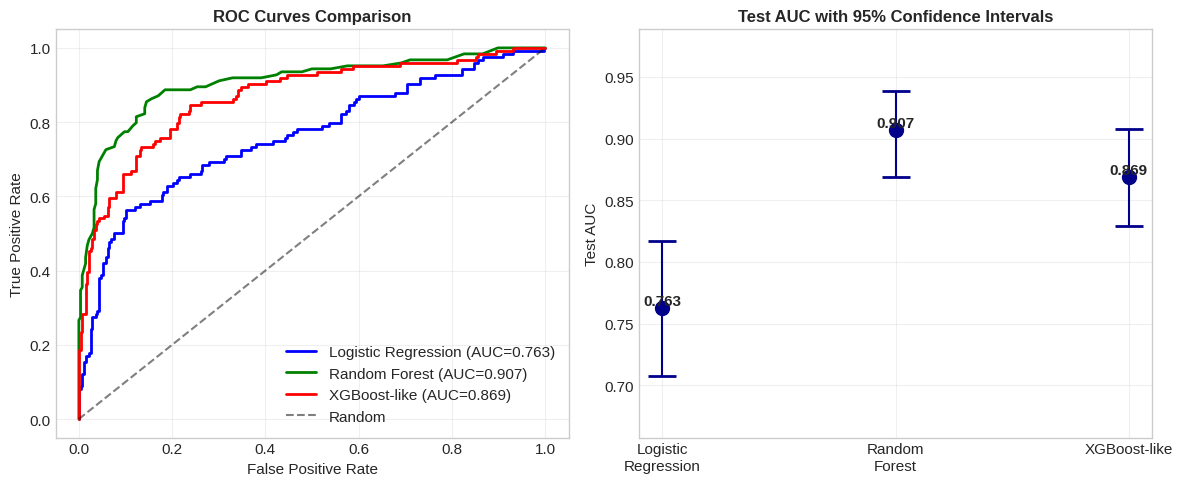


🏆 BEST MODEL: Random Forest
   Test AUC: 0.9066
   95% CI: [0.8688, 0.9386]

⚖️  OPTIMAL THRESHOLD (Youden's J): 0.370
   At this threshold: TPR=0.855, FPR=0.145


In [10]:
# COMPLETE ROC-AUC WORKFLOW TEMPLATE
print("🚀 COMPLETE ROC-AUC WORKFLOW DEMONSTRATION")
print("="*70)

# Step 1: Generate realistic data
np.random.seed(42)
X, y = make_classification(n_samples=2000, n_features=15, n_informative=8, 
                           n_redundant=3, n_classes=2, weights=[0.7, 0.3], 
                           flip_y=0.05, random_state=42)

print(f"📊 Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"           Class balance: {np.bincount(y)[0]} neg, {np.bincount(y)[1]} pos")

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✂️  Split: {len(X_train)} train, {len(X_test)} test")

# Step 3: Cross-Validation Setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Train Multiple Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost-like': RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
}

results = {}

print("\n🤖 TRAINING MODELS WITH CROSS-VALIDATION")
print("-" * 70)

for name, model in models.items():
    print(f"\n🔹 {name}:")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Test set predictions
    y_proba = model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_proba)
    
    # Bootstrap CI for test set
    _, lower, upper, _ = bootstrap_auc(y_test, y_proba, n_bootstrap=500)
    
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_auc': test_auc,
        'ci_lower': lower,
        'ci_upper': upper,
        'proba': y_proba
    }
    
    print(f"   CV AUC:  {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    print(f"   Test AUC: {test_auc:.4f} [{lower:.4f}, {upper:.4f}]")

# Step 5: Comparison and Visualization
print("\n" + "="*70)
print("📊 FINAL COMPARISON TABLE")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV_AUC_Mean': [results[m]['cv_mean'] for m in results],
    'CV_AUC_Std': [results[m]['cv_std'] for m in results],
    'Test_AUC': [results[m]['test_auc'] for m in results],
    'CI_Lower': [results[m]['ci_lower'] for m in results],
    'CI_Upper': [results[m]['ci_upper'] for m in results]
}).round(4)

print(comparison_df.to_string(index=False))

# Step 6: ROC Curves Comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['blue', 'green', 'red']
for (name, data), color in zip(results.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, data['proba'])
    plt.plot(fpr, tpr, color=color, lw=2, 
             label=f"{name} (AUC={data['test_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison', fontweight='bold', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Step 7: Confidence Intervals
plt.subplot(1, 2, 2)
models_list = list(results.keys())
test_aucs = [results[m]['test_auc'] for m in models_list]
ci_lower = [results[m]['ci_lower'] for m in models_list]
ci_upper = [results[m]['ci_upper'] for m in models_list]

errors = [[test_aucs[i] - ci_lower[i] for i in range(len(models_list))],
          [ci_upper[i] - test_aucs[i] for i in range(len(models_list))]]

x_pos = np.arange(len(models_list))
plt.errorbar(x_pos, test_aucs, yerr=errors, fmt='o', capsize=10, capthick=2, 
             markersize=10, color='darkblue')
plt.xticks(x_pos, [m.replace(' ', '\n') for m in models_list])
plt.ylabel('Test AUC')
plt.title('Test AUC with 95% Confidence Intervals', fontweight='bold', fontsize=12)
plt.ylim(min(ci_lower)-0.05, max(ci_upper)+0.05)
plt.grid(True, alpha=0.3)

for i, (model, auc_val) in enumerate(zip(models_list, test_aucs)):
    plt.text(i, auc_val, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('complete_roc_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Step 8: Best Model Selection
best_model = max(results, key=lambda x: results[x]['test_auc'])
print(f"\n🏆 BEST MODEL: {best_model}")
print(f"   Test AUC: {results[best_model]['test_auc']:.4f}")
print(f"   95% CI: [{results[best_model]['ci_lower']:.4f}, {results[best_model]['ci_upper']:.4f}]")

# Step 9: Threshold Analysis (Youden's J statistic)
fpr, tpr, thresholds = roc_curve(y_test, results[best_model]['proba'])
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
optimal_threshold = thresholds[best_idx]

print(f"\n⚖️  OPTIMAL THRESHOLD (Youden's J): {optimal_threshold:.3f}")
print(f"   At this threshold: TPR={tpr[best_idx]:.3f}, FPR={fpr[best_idx]:.3f}")



## 📖 **Chapter 11: Common Pitfalls & How to Avoid Them**

### ⚠️ **Top 10 ROC-AUC Mistakes**

| # | Mistake | Why It's Wrong | Solution |
|---|---------|----------------|----------|
| 1 | **Using accuracy instead of AUC for imbalanced data** | Accuracy can be high by predicting majority class | Always check class balance first |
| 2 | **Not using stratified sampling** | Train/test splits might have different class distributions | Use `stratify=y` in train_test_split |
| 3 | **Optimizing threshold on test set** | Leads to optimistic performance estimates | Use validation set or CV for threshold tuning |
| 4 | **Ignoring calibration** | High AUC doesn't mean probabilities are accurate | Use calibration curves (reliability diagrams) |
| 5 | **Comparing AUCs without statistical tests** | Differences might be due to chance | Use DeLong's test or bootstrap CIs |
| 6 | **Using AUC for multi-class without modification** | Standard AUC is binary-only | Use OvR (One-vs-Rest) or OvO (One-vs-One) |
| 7 | **Not checking for data leakage** | Leaked features inflate AUC artificially | Check feature-target correlations carefully |
| 8 | **Reporting AUC without confidence intervals** | Point estimates hide uncertainty | Always provide 95% CIs |
| 9 | **Using AUC when you need specific precision/recall** | AUC averages all thresholds | Use F1-score or PR-AUC if specific threshold matters |
| 10 | **Forgetting to set random seeds** | Results not reproducible | Always set `random_state` |

### 🛡️ **Defensive Programming Checklist**

```python
✅ Before calculating AUC:
   □ Check for NaN in predictions
   □ Verify predictions are probabilities [0, 1]
   □ Confirm both classes present in y_true
   □ Check for constant predictions (AUC undefined)
   
✅ When comparing models:
   □ Use same train/test split
   □ Same cross-validation folds
   □ Same random seed
   □ Statistical significance test
```



## 🎓 **Summary & Cheat Sheet**

### 📝 **ROC-AUC Cheat Sheet**

```
┌─────────────────────────────────────────────────────────────┐
│  DEFINITION: Area under the ROC curve (TPR vs FPR)         │
│  RANGE: [0.5, 1.0] for useful models (0.5 = random)        │
│  INTERPRETATION: Probability that model ranks random        │
│                  positive higher than random negative       │
└─────────────────────────────────────────────────────────────┘
```

### 🎯 **When to Use Quick Reference**

| Scenario | Use ROC-AUC? | Alternative |
|----------|--------------|-------------|
| Balanced binary classification | ✅ Yes | - |
| Imbalanced (1:10 to 1:100) | ⚠️ Maybe | Check PR-AUC too |
| Imbalanced (> 1:100) | ❌ No | Use PR-AUC |
| Need calibrated probabilities | ❌ No | Use Log-loss |
| Multi-class classification | ⚠️ Modify | Use OvR AUC |
| Need specific precision/recall | ❌ No | Use F-beta score |

### 📚 **Key Formulas**

| Metric | Formula | Range |
|--------|---------|-------|
| TPR (Recall) | TP / (TP + FN) | [0, 1] |
| FPR | FP / (FP + TN) | [0, 1] |
| AUC | ∫ TPR d(FPR) | [0, 1] |
| Youden's J | TPR - FPR | [-1, 1] |

### 🎓 **Learning Path**

1. ✅ **Beginner:** Understand confusion matrix → TPR/FPR → Basic ROC curve
2. ✅ **Intermediate:** Bootstrap CIs → Model comparison → Threshold selection  
3. ✅ **Advanced:** PR-AUC → Cost-sensitive learning → Multi-class extensions

---

## 🙏 **Thank You!**

You've now mastered ROC-AUC from theory to practice! 

**Next Steps:**
- Try this on your own dataset
- Experiment with different thresholds
- Compare ROC-AUC with PR-AUC
- Explore cost-sensitive learning

**Remember:** A good data scientist doesn't just calculate metrics—they understand what they mean! 🚀

---

*Happy Modeling!* 📊✨



🎮 BONUS: Threshold Explorer
See how metrics change with different classification thresholds!



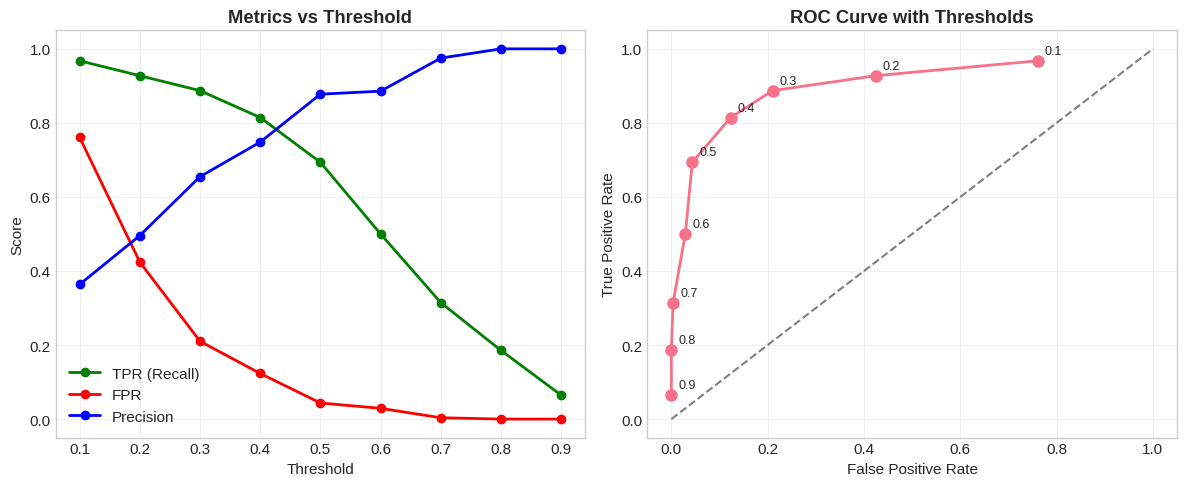


📊 Metrics Table:
 Threshold   TPR   FPR  Precision    F1
       0.1 0.968 0.761      0.364 0.529
       0.2 0.927 0.424      0.496 0.646
       0.3 0.887 0.210      0.655 0.753
       0.4 0.815 0.123      0.748 0.780
       0.5 0.694 0.043      0.878 0.775
       0.6 0.500 0.029      0.886 0.639
       0.7 0.315 0.004      0.975 0.476
       0.8 0.185 0.000      1.000 0.313
       0.9 0.065 0.000      1.000 0.121


In [11]:
# BONUS: Interactive threshold explorer
def interactive_threshold_explorer(y_true, y_proba):
    """
    Interactive widget to explore different thresholds (static version for notebook)
    """
    thresholds = np.arange(0.1, 1.0, 0.1)
    metrics = []
    
    for thresh in thresholds:
        y_pred = (y_proba >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * (precision * tpr) / (precision + tpr) if (precision + tpr) > 0 else 0
        
        metrics.append({
            'Threshold': thresh,
            'TPR': tpr,
            'FPR': fpr,
            'Precision': precision,
            'F1': f1
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(metrics_df['Threshold'], metrics_df['TPR'], 'g-o', label='TPR (Recall)', linewidth=2)
    plt.plot(metrics_df['Threshold'], metrics_df['FPR'], 'r-o', label='FPR', linewidth=2)
    plt.plot(metrics_df['Threshold'], metrics_df['Precision'], 'b-o', label='Precision', linewidth=2)
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Metrics vs Threshold', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(metrics_df['FPR'], metrics_df['TPR'], 'o-', linewidth=2, markersize=8)
    for i, thresh in enumerate(thresholds):
        plt.annotate(f'{thresh:.1f}', 
                    (metrics_df.iloc[i]['FPR'], metrics_df.iloc[i]['TPR']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Thresholds', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return metrics_df

# Run interactive explorer
print("🎮 BONUS: Threshold Explorer")
print("See how metrics change with different classification thresholds!\n")
metrics_table = interactive_threshold_explorer(y_test, results[best_model]['proba'])
print("\n📊 Metrics Table:")
print(metrics_table.round(3).to_string(index=False))

## ✍️ **Author Details**

**Name:** Tassawar Abbas  
**Email:** [abbas829@gmail.com](mailto:abbas829@gmail.com)